<a href="https://colab.research.google.com/github/kavyajeetbora/geemap/blob/master/notebooks/11_exporting_ee_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exporting google earth images

Exporting the google earth images to GeoTIFF file and numpy array

## Import libraries

In [74]:
import geemap
import ee

## Create an interactive map

In [75]:
geemap.show_youtube('_6JOA-iiEGU')

Output(layout=Layout(width='815px'))

## Download the image from google earth

In [77]:
Map = geemap.Map(center=[40,-100], zoom=4)
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

In [78]:
image = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003')

landsat_vis = {'bands': ['B4', 'B3', 'B2'], 'gamma': 1.4}
Map.addLayer(image, landsat_vis, "LE7_TOA_5YEAR/1999_2003", True, 0.7)

## Access the extend



In [83]:
feature = Map.draw_last_feature
roi = feature.geometry()
roi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Feature.geometry",
    "arguments": {
      "feature": {
        "functionInvocationValue": {
          "functionName": "Feature",
          "arguments": {
            "geometry": {
              "functionInvocationValue": {
                "functionName": "GeometryConstructors.Polygon",
                "arguments": {
                  "coordinates": {
                    "constantValue": [
                      [
                        [
                          -85.139923,
                          45.625563
                        ],
                        [
                          -85.139923,
                          46.059891
                        ],
                        [
                          -84.261017,
                          46.059891
                        ],
                        [
                          -84.261017,
                          45.625563
                        ],
                        [
                          -85.139923,
                          45.625563
                        ]
                      ]
                    ]
                  }
                }
              }
            }
          }
        }
      }
    }
  }
})

## Export the image to GeoTIFF

Exporting all bands to one file

In [84]:
geemap.ee_export_image(image, filename="landsat.tif", scale=90, region=roi, file_per_band=False)

Generating URL ...
Please wait ...
Data downloaded to /content/landsat.tif


Exporting all bands into one single image each

In [85]:
geemap.ee_export_image(image, filename="landsat_2.tif", scale=90, region=roi, file_per_band=True)

Generating URL ...
Please wait ...
Data downloaded to /content


## Download earth engine image collection

In [86]:
loc = ee.Geometry.Point(-99.2222, 46.7816)
collection = (
    ee.ImageCollection('USDA/NAIP/DOQQ')
    .filterBounds(loc)
    .filterDate('2008-01-01', '2020-01-01')
    .filter(ee.Filter.listContains("system:band_names", "N"))
)

In [88]:
geemap.ee_export_image_collection(collection, out_dir="\\")

Total number of images: 9

Exporting 1/9: \/m_4609915_sw_14_060_20180902_20181213.tif
Generating URL ...
An error occurred while downloading.
Total request size (822703200 bytes) must be less than or equal to 50331648 bytes.


Exporting 2/9: \/m_4609915_sw_14_060_20190626.tif
Generating URL ...
An error occurred while downloading.
Total request size (849205448 bytes) must be less than or equal to 50331648 bytes.


Exporting 3/9: \/m_4609915_sw_14_1_20090818.tif
Generating URL ...
An error occurred while downloading.
Total request size (342797672 bytes) must be less than or equal to 50331648 bytes.


Exporting 4/9: \/m_4609915_sw_14_1_20100629.tif
Generating URL ...
An error occurred while downloading.
Total request size (330117216 bytes) must be less than or equal to 50331648 bytes.


Exporting 5/9: \/m_4609915_sw_14_1_20120714.tif
Generating URL ...
An error occurred while downloading.
Total request size (330117216 bytes) must be less than or equal to 50331648 bytes.


Exporting 6/9: 

## Exporting images to Numpy arrays

In [89]:
import numpy as np
import matplotlib.pyplot as plt

img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810').select(['B4', 'B5', 'B6'])

aoi = ee.Geometry.Polygon(
    [[[-110.8, 44.7], [-110.8, 44.6], [-110.6, 44.6], [-110.6, 44.7]]], None, False
)

rgb_img = geemap.ee_to_numpy(img, region=aoi)
print(rgb_img.shape)

(373, 531, 3)


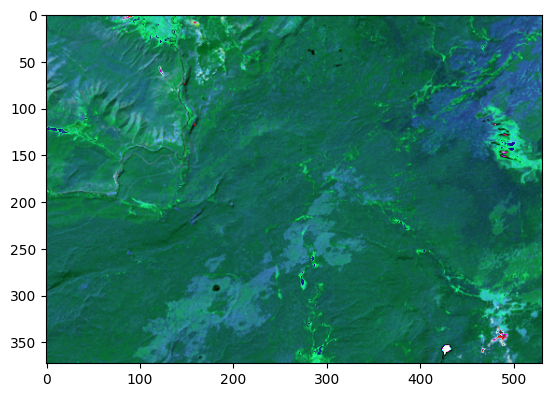

In [90]:
# Scale the data to [0, 255] to show as an RGB image.
# Adapted from https://bit.ly/2XlmQY8. Credits to Justin Braaten
rgb_img_test = (255 * ((rgb_img[:, :, 0:3] - 100) / 3500)).astype('uint8')
plt.imshow(rgb_img_test)
plt.show()